In [33]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [35]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/QuadSinHFLowNoise/


In [36]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "Diff01_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/QuadSinHFLowNoise/Ridge_fQuadSinHF_DriftEvalExp_10240NPaths_3906e-03dT_Diff01_MSEs.parquet


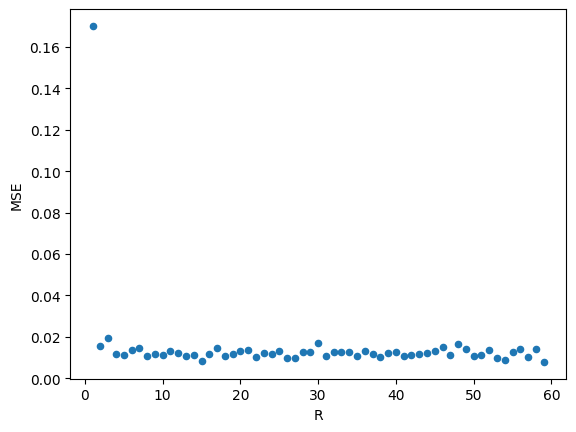

In [37]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [38]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
1      0.170128
2      0.015723
3      0.019184
4      0.011479
5      0.011267
6      0.013750
7      0.014694
8      0.010566
9      0.011482
10     0.011043
11     0.013176
12     0.012055
13     0.010753
14     0.011216
15     0.008545
16     0.011612
17     0.014723
18     0.010662
19     0.011675
20     0.012977
21     0.013428
22     0.010114
23     0.012213
24     0.011800
25     0.013321
26     0.009972
27     0.009931
28     0.012882
29     0.012637
30     0.017078
31     0.010607
32     0.012744
33     0.012632
34     0.012880
35     0.010638
36     0.013065
37     0.011856
38     0.010457
39     0.012055
40     0.012522
41     0.010879
42     0.011280
43     0.011919
44     0.012139
45     0.013159
46     0.014901
47     0.011077
48     0.016708
49     0.013970
50     0.010868
51     0.011314
52     0.013860
53     0.009538
54     0.008890
55     0.012802
56     0.014277
57     0.010342
58     0.014017
59     0.007863


0    0.007863
Name: 59

In [39]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd.replace('LowNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

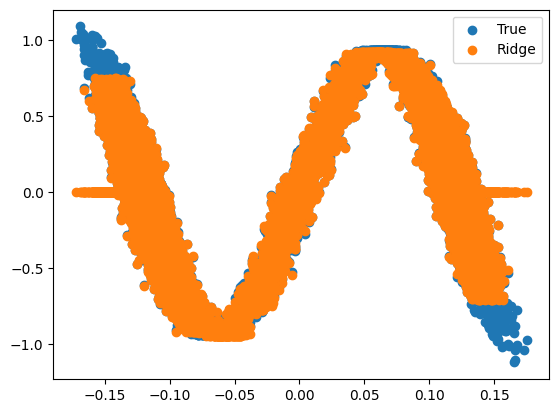

In [40]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()